In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
retail = pd.read_excel('Online Retail.xlsx')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
retail['TotalAmount'] = retail['Quantity'] * retail['UnitPrice']

In [4]:
retail.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cust

In [5]:
retail.shape
print('The Dataset has ' + str(retail.shape[0]) + ' rows and ' + str(retail.shape[1]) + ' columns')

The Dataset has 541909 rows and 9 columns


Data Definitions: Column names, Data Types, Description of Columns, Counts and Percents of Unique Values, Ranges of Values

In [6]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalAmount'],
      dtype='object')

Checking for missing values in dataset

In [7]:
missing_values = pd.concat([retail.isnull().sum(), 100 * retail.isnull().mean()], axis=1)
missing_values.rename(columns={0: 'Count', 1: 'Percent'}, inplace=True)
missing_values

,Count,Percent
InvoiceNo,0,0.000000
StockCode,0,0.000000
Description,1454,0.268311
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
CustomerID,135080,24.926694
Country,0,0.000000
TotalAmount,0,0.000000


There are 1454 items without a description in the "Description" column in the dataset. This accounts for .27% of the total dataset. There are 135080 rows without a "CustomerID", which is about 25% of the dataset. 

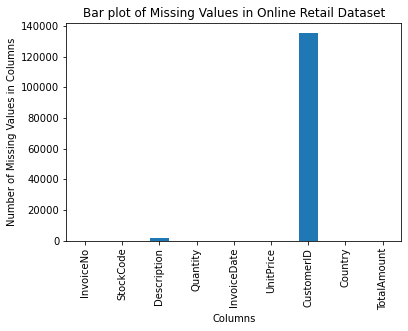

In [8]:
missing_values['Count'].plot(kind='bar')
plt.title('Bar plot of Missing Values in Online Retail Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values in Columns')
plt.show()

In [9]:
retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
TotalAmount           float64
dtype: object

CustomerID column is of float64 data type. They should be integers to correctly represent each customer. Also since CustomerID column has null values. These values must removed first before converting the entire column to int64 datatype.

In [10]:
retail.isna().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
TotalAmount    False
dtype: bool

In [11]:
free = retail['UnitPrice'] == 0.0
df = retail[~free]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [12]:
df.groupby('UnitPrice')['Description'].value_counts()

UnitPrice   Description               
-11062.060  Adjust bad debt               2
 0.001      PADS TO MATCH ALL CUSHIONS    3
            Bank Charges                  1
 0.010      Discount                      1
 0.030      Discount                      1
                                         ..
 13541.330  AMAZON FEE                    3
 16453.710  AMAZON FEE                    1
 16888.020  AMAZON FEE                    1
 17836.460  AMAZON FEE                    1
 38970.000  Manual                        1
Name: Description, Length: 16144, dtype: int64

In [13]:
df.StockCode.nunique()

3938

In [14]:
duplicates = df.duplicated(['StockCode', 'InvoiceNo'], keep=False)
df_dup = df[duplicates].sort_values('CustomerID')

In [15]:
df = df.drop_duplicates(keep=False)

df[duplicates].sort_values('CustomerID')

<ipython-input-15-18dcb513b598>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[duplicates].sort_values('CustomerID')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
34097,539318,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2010-12-16 19:09:00,0.55,12348.0,Finland,13.20
34088,539318,21213,PACK OF 72 SKULL CAKE CASES,120,2010-12-16 19:09:00,0.42,12348.0,Finland,50.40
34098,539318,21977,PACK OF 60 PINK PAISLEY CAKE CASES,120,2010-12-16 19:09:00,0.42,12348.0,Finland,50.40
34087,539318,21213,PACK OF 72 SKULL CAKE CASES,24,2010-12-16 19:09:00,0.55,12348.0,Finland,13.20
34086,539318,84991,60 TEATIME FAIRY CAKE CASES,120,2010-12-16 19:09:00,0.42,12348.0,Finland,50.40
...,...,...,...,...,...,...,...,...,...
541273,581497,21481,FAWN BLUE HOT WATER BOTTLE,1,2011-12-09 10:23:00,10.29,NaN,United Kingdom,10.29
541287,581497,22356,CHARLOTTE BAG PINK POLKADOT,25,2011-12-09 10:23:00,2.46,NaN,United Kingdom,61.50
541288,581497,22356,CHARLOTTE BAG PINK POLKADOT,1,2011-12-09 10:23:00,5.63,NaN,United Kingdom,5.63
541308,581497,23206,LUNCH BAG APPLE DESIGN,3,2011-12-09 10:23:00,4.96,NaN,United Kingdom,14.88


In [16]:
df[df['StockCode'] == 'D']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
9038,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527.0,United Kingdom,-29.29
14498,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498.0,United Kingdom,-281.00
19392,C537857,D,Discount,-1,2010-12-08 16:00:00,267.12,17340.0,United Kingdom,-267.12
31134,C538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422.0,United Kingdom,-5.76
...,...,...,...,...,...,...,...,...,...
479868,C577227,D,Discount,-1,2011-11-18 12:06:00,19.82,14527.0,United Kingdom,-19.82
479869,C577227,D,Discount,-1,2011-11-18 12:06:00,16.76,14527.0,United Kingdom,-16.76
493613,C578239,D,Discount,-1,2011-11-23 12:29:00,26.33,14912.0,Italy,-26.33
516221,C579884,D,Discount,-1,2011-11-30 17:34:00,20.53,14527.0,United Kingdom,-20.53


In [17]:
df[df['StockCode'] == 'M']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom,1.25
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.0,United Kingdom,18.95
5684,536865,M,Manual,1,2010-12-03 11:28:00,2.55,NaN,United Kingdom,2.55
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723.0,United Kingdom,1.70
7976,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062.0,United Kingdom,5.04
...,...,...,...,...,...,...,...,...,...
531432,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841.0,United Kingdom,5.00
533082,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971.0,United Kingdom,-125.00
534308,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490.0,United Kingdom,-9.95
538321,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521.0,United Kingdom,1.26


In [18]:
one_letter = df['StockCode'].str.len() == 1
df[one_letter]['Description'].value_counts()

Manual             560
Discount            77
SAMPLES             61
Adjust bad debt      3
Name: Description, dtype: int64

In [19]:
negative = df['Quantity'] <= 0
df = df[~negative]

In [20]:
df.describe()


,Quantity,UnitPrice,CustomerID,TotalAmount
count,520038.000000,520038.000000,387883.000000,520038.000000
mean,10.686665,3.894190,15281.730762,20.377687
std,156.989293,42.257685,1713.926205,273.813429
min,1.000000,-11062.060000,12346.000000,-11062.060000
25%,1.000000,1.250000,13941.000000,4.130000
50%,4.000000,2.080000,15144.000000,9.950000
75%,12.000000,4.130000,16788.000000,17.700000
max,80995.000000,13541.330000,18287.000000,168469.600000


In [21]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [22]:
df[df['Quantity'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount


In [23]:
df = df[~one_letter]

<ipython-input-23-09d9061e8b2f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~one_letter]


In [24]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [25]:
more_than_one = df['Quantity'] > 1
df = df[more_than_one] 

In [26]:
df.StockCode.nunique()

3716

In [27]:
null = df.CustomerID.isna()
df['CustomerID'] = df['CustomerID'].fillna(0)

In [28]:
df['CustomerID'] = df['CustomerID'].astype('int')

In [29]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [30]:
df['Year'] = df['InvoiceDate'].dt.year

In [31]:
customers_country = df.groupby('Country').CustomerID.nunique().reset_index()
customers_country.columns = ['Country', 'Customers']
customers_country

,Country,Customers
0,Australia,9
1,Austria,11
2,Bahrain,3
3,Belgium,25
4,Brazil,1
5,Canada,4
6,Channel Islands,9
7,Cyprus,8
8,Czech Republic,1
9,Denmark,9


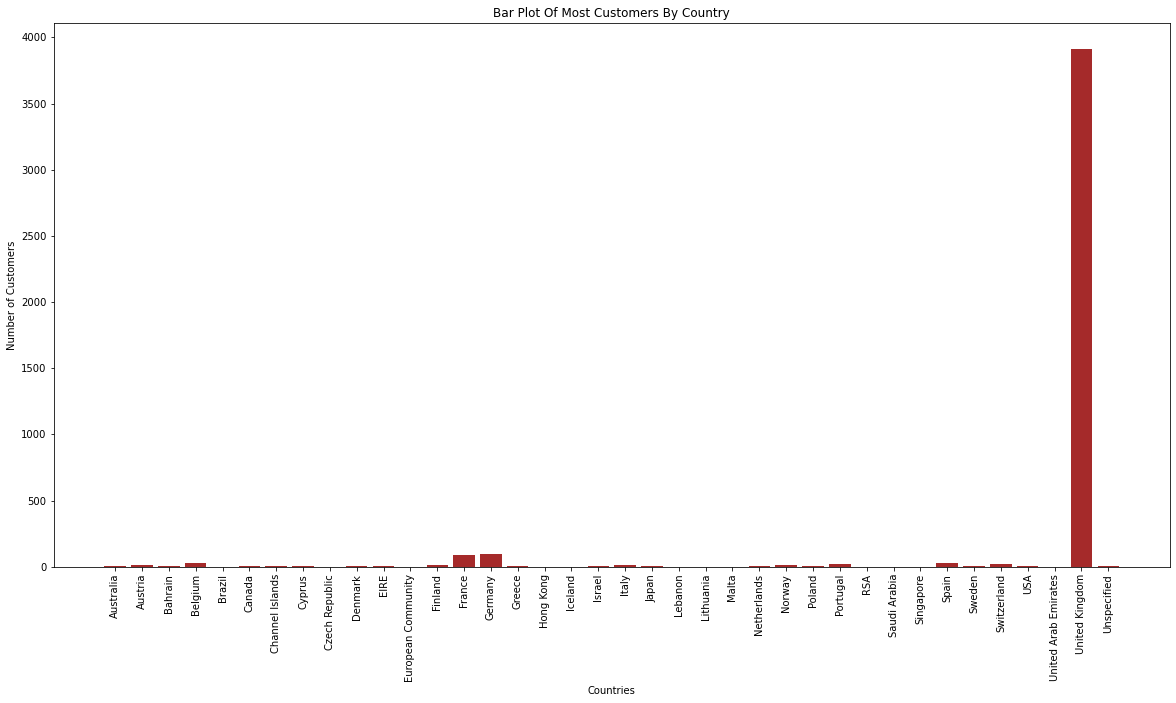

In [32]:
fig = plt.figure(figsize=(20,10))
ax = plt.subplot()
ax.bar(customers_country['Country'], customers_country['Customers'], color='brown')
plt.xticks(rotation=90)
plt.title('Bar Plot Of Most Customers By Country')
plt.xlabel('Countries')
plt.ylabel('Number of Customers')
plt.show()

In [33]:
orders_country = df.groupby('Country').InvoiceNo.nunique().reset_index()
orders_country.columns = ['Country', 'Count']


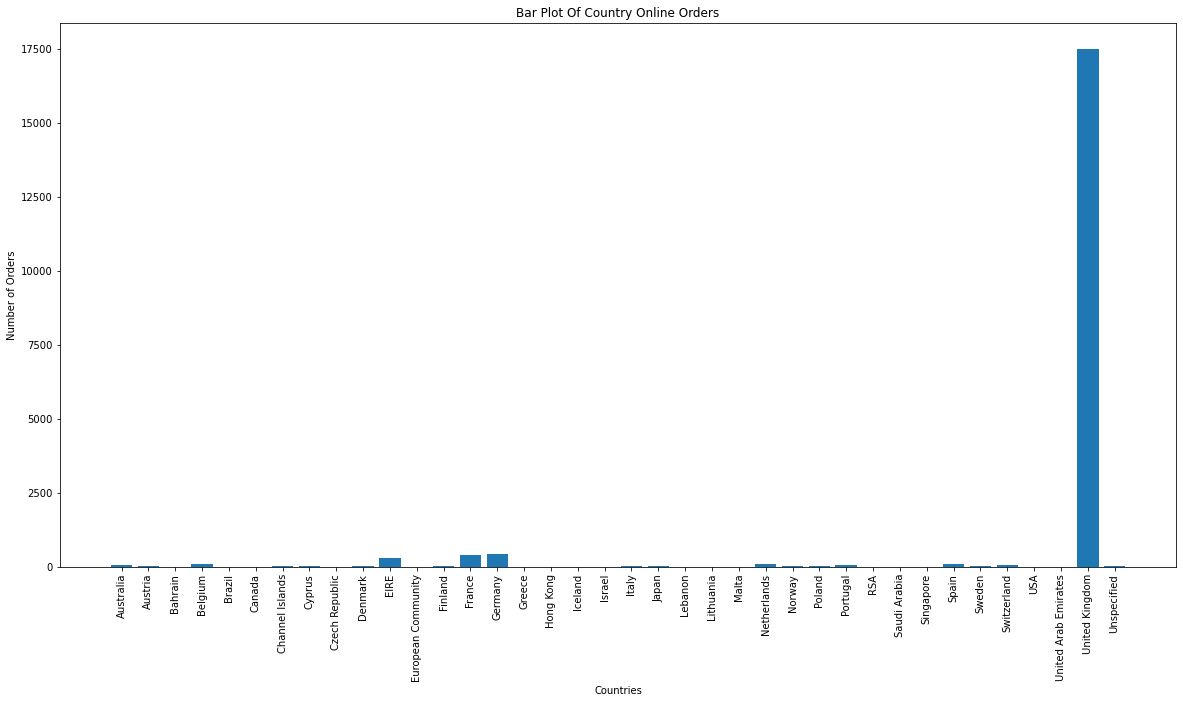

In [34]:
fig = plt.figure(figsize=(20,10))
ax = plt.subplot()
ax.bar(orders_country['Country'], orders_country['Count'])
plt.xticks(rotation=90)
plt.title('Bar Plot Of Country Online Orders')
plt.xlabel('Countries')
plt.ylabel('Number of Orders')
plt.show()

In [35]:
orders = df.groupby('Description').InvoiceNo.nunique().reset_index()
orders.columns = ['product', 'item_count']
orders
orders = orders.sort_values(by='item_count', ascending=False)
topten = orders.head(10)

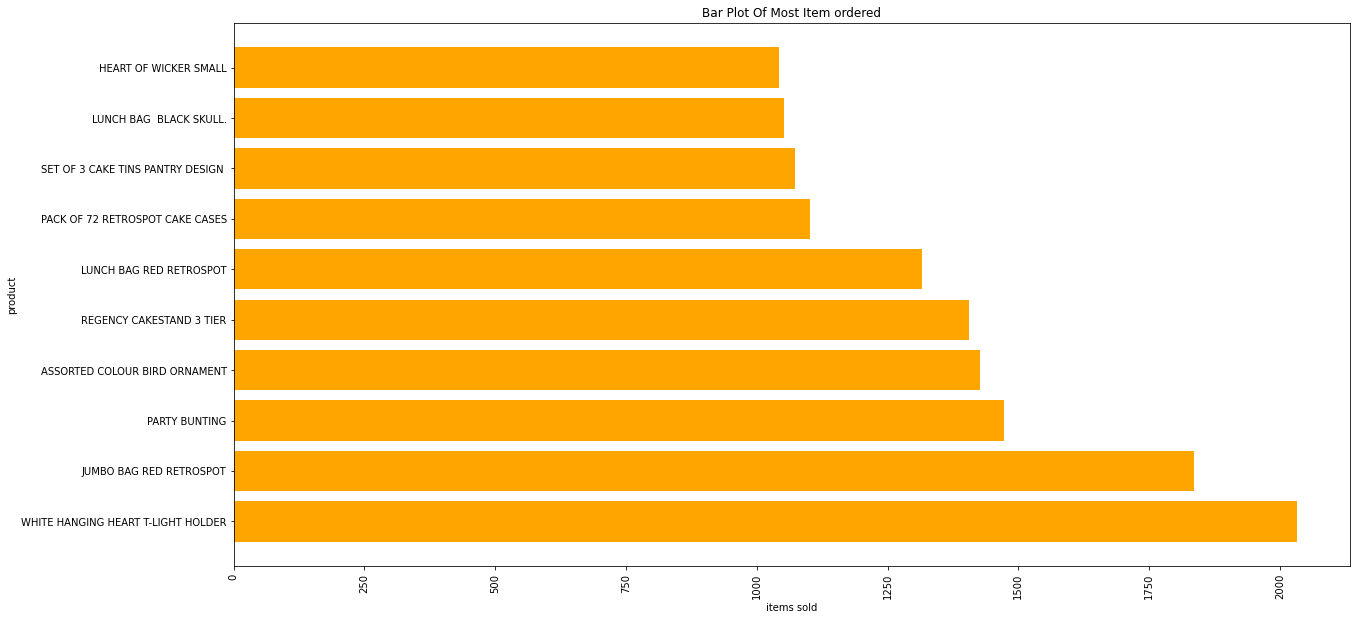

In [36]:
fig = plt.figure(figsize=(20,10))
ax = plt.subplot()
ax.barh(topten['product'], topten['item_count'], color='orange')
plt.xticks(rotation=90)
plt.title('Bar Plot Of Most Item ordered')
plt.xlabel('items sold')
plt.ylabel('product')
plt.show()

In [37]:
non_uk = df[df['Country'] != 'United Kingdom']
non_uk = non_uk.groupby('Country').InvoiceNo.nunique().reset_index()
non_uk.columns = ['Country', 'Orders']

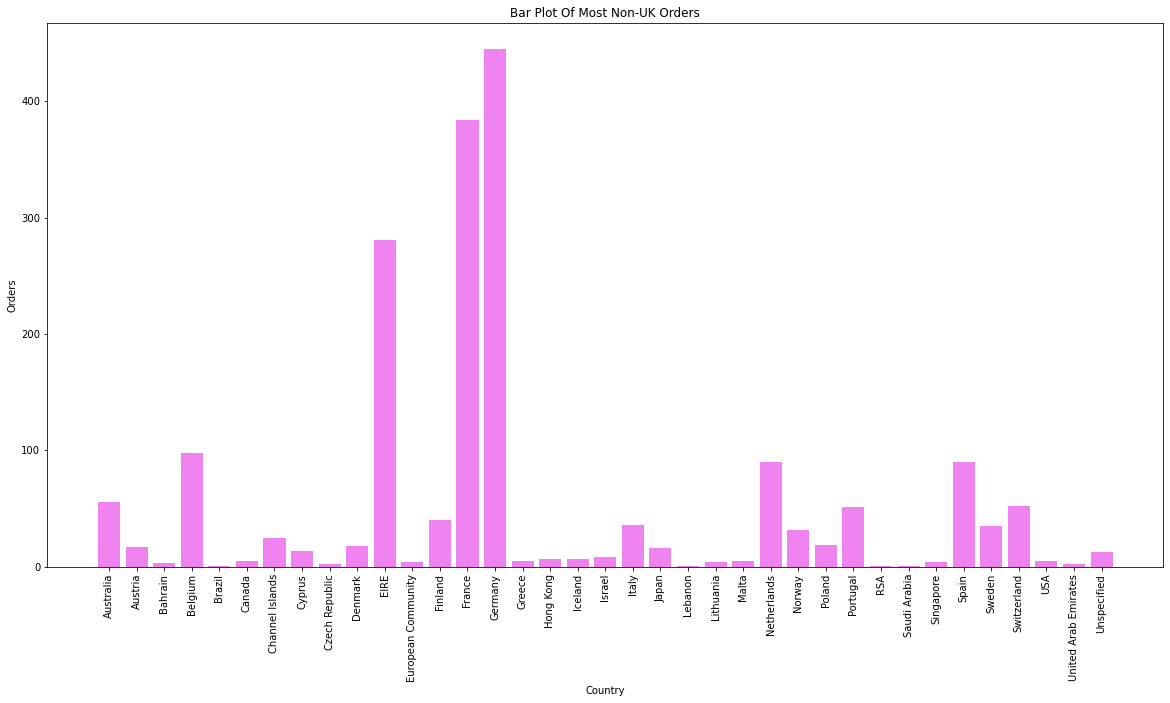

In [38]:
fig = plt.figure(figsize=(20,10))
ax = plt.subplot()
ax.bar(non_uk['Country'], non_uk['Orders'], color='violet')
plt.xticks(rotation=90)
plt.title('Bar Plot Of Most Non-UK Orders')
plt.xlabel('Country')
plt.ylabel('Orders')
plt.show()

In [39]:
df['Hour'] = df['InvoiceDate'].dt.hour

In [79]:
time = df.groupby('Hour').TotalAmount.sum().reset_index()
time.columns = ['Hour', 'TotalSales']
time

,Hour,TotalSales
0,7,30867.16
1,8,280571.07
2,9,923439.41
3,10,1363299.01
4,11,1145019.20
5,12,1346056.66
6,13,1159115.92
7,14,1048473.49
8,15,1152047.50
9,16,604873.96


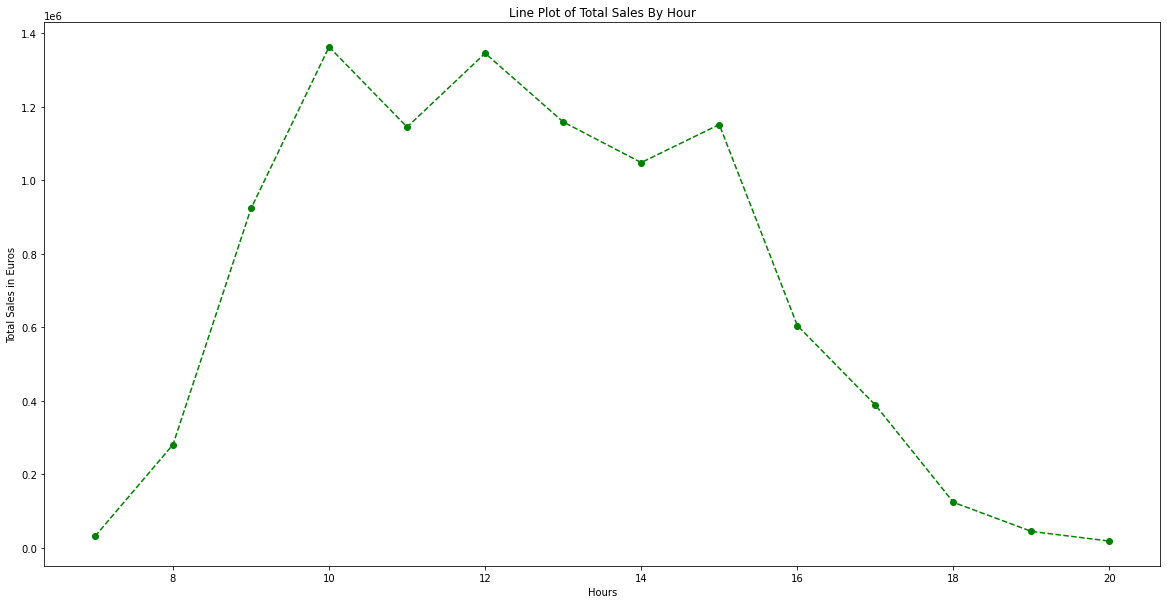

In [85]:
plt.figure(figsize=(20, 10))
plt.plot(time['Hour'], time['TotalSales'], marker='o', linestyle='--', color='g')
plt.title('Line Plot of Total Sales By Hour')
plt.xlabel('Hours')
plt.ylabel('Total Sales in Euros')
plt.show()

In [42]:
prices = df.groupby(['UnitPrice', 'Description']).StockCode.count().reset_index()
prices = prices.sort_values(by='UnitPrice', ascending=False)
prices.columns = ['UnitPrice', 'Description', 'Product Count']
toptenprice = prices.head(10)
toptenprice = toptenprice.sort_values(by='UnitPrice')

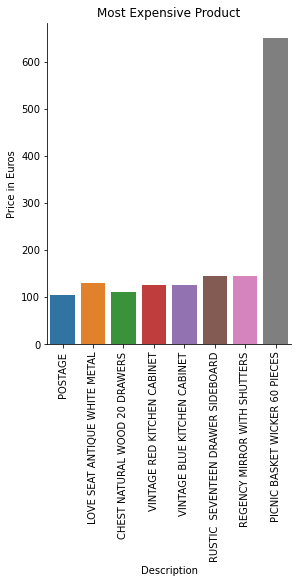

In [76]:
sns.catplot(x='Description', y='UnitPrice', data=toptenprice, kind='bar', ci=None)
plt.title('Most Expensive Product')
plt.xticks(rotation=90)
plt.ylabel('Price in Euros')
plt.xlabel('Description')
plt.show()

In [44]:
df['Month'] = df['InvoiceDate'].dt.month
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Hour,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,8,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,8,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,8,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,8,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,8,12


In [45]:
month_sales = df.groupby('Month').TotalAmount.mean().reset_index()
month_sales.columns = ['Month', 'avg_sales']
month_sales

,Month,avg_sales
0,1,26.347188
1,2,24.653114
2,3,25.003285
3,4,22.862932
4,5,25.745560
5,6,26.795779
6,7,23.691805
7,8,26.345413
8,9,26.012003
9,10,23.917013


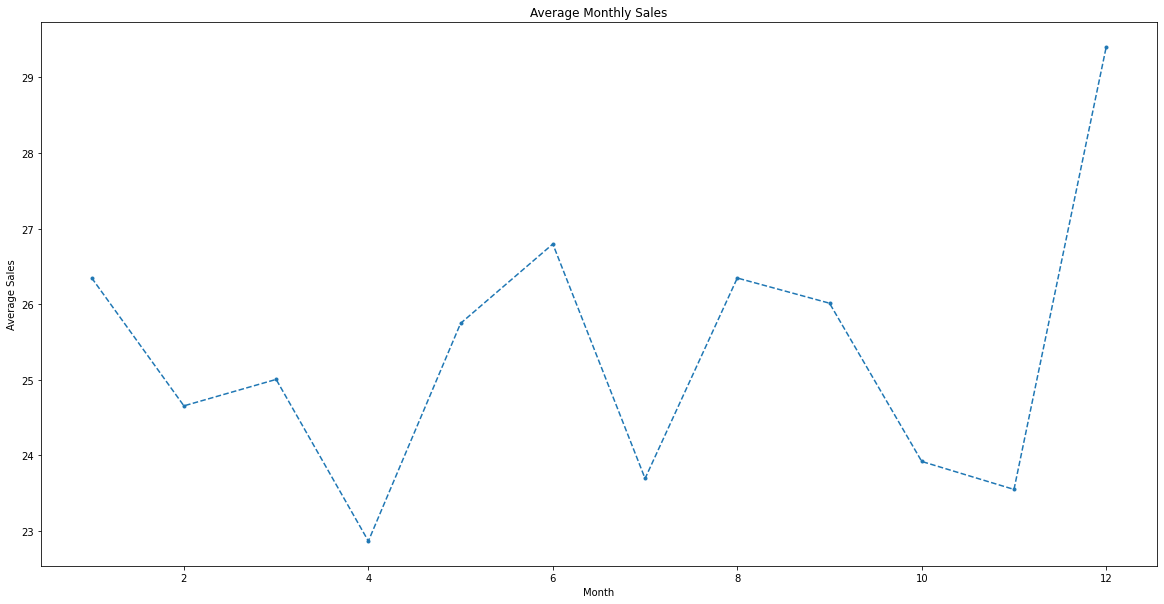

In [110]:
plt.figure(figsize=(20, 10))
plt.plot(month_sales['Month'], month_sales['avg_sales'], marker='.', linestyle='--')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.show()

In [47]:
december = df['Month'] > 11
holiday = df[december]
mean_holiday_sales = holiday.groupby('Year').TotalAmount.mean().reset_index()
holiday



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Hour,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,8,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,8,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,8,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,8,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,8,12
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011,12,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011,12,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12,12


In [49]:
holiday_2010 = holiday.loc[holiday['Year'] == 2010, 'TotalAmount']
holiday_2011 = holiday.loc[holiday['Year'] == 2011, 'TotalAmount']

In [50]:
mean_2010_sales = np.mean(holiday_2010)
mean_2011_sales = np.mean(holiday_2011)
len(holiday['TotalAmount'])
print(mean_2010_sales)
/
print(mean_2011_sales)

26.649484369114795
33.615281726618896


In [51]:
x = ttest_ind(holiday_2010, holiday_2011)
x

Ttest_indResult(statistic=-0.8836092834193682, pvalue=0.37691200220456245)

In [52]:
canceled = retail['Quantity'] < 0
canceled_items = retail[canceled]

In [99]:
canceled_orders = canceled_items.groupby(['Description']).InvoiceNo.nunique().reset_index()
canceled_orders = canceled_orders.sort_values(by='InvoiceNo', ascending=False)
canceled_orders.columns = ['product', 'canceled_orders']
top_20_cancel = canceled_orders.head(20)
top_20_cancel

,product,canceled_orders
1126,Manual,223
1437,REGENCY CAKESTAND 3 TIER,180
1342,POSTAGE,124
2024,check,120
918,JAM MAKING SET WITH JARS,87
1572,SET OF 3 CAKE TINS PANTRY DESIGN,73
562,Discount,65
1495,ROSES REGENCY TEACUP AND SAUCER,54
1747,STRAWBERRY CERAMIC TRINKET BOX,52
1361,RECIPE BOX PANTRY YELLOW DESIGN,47


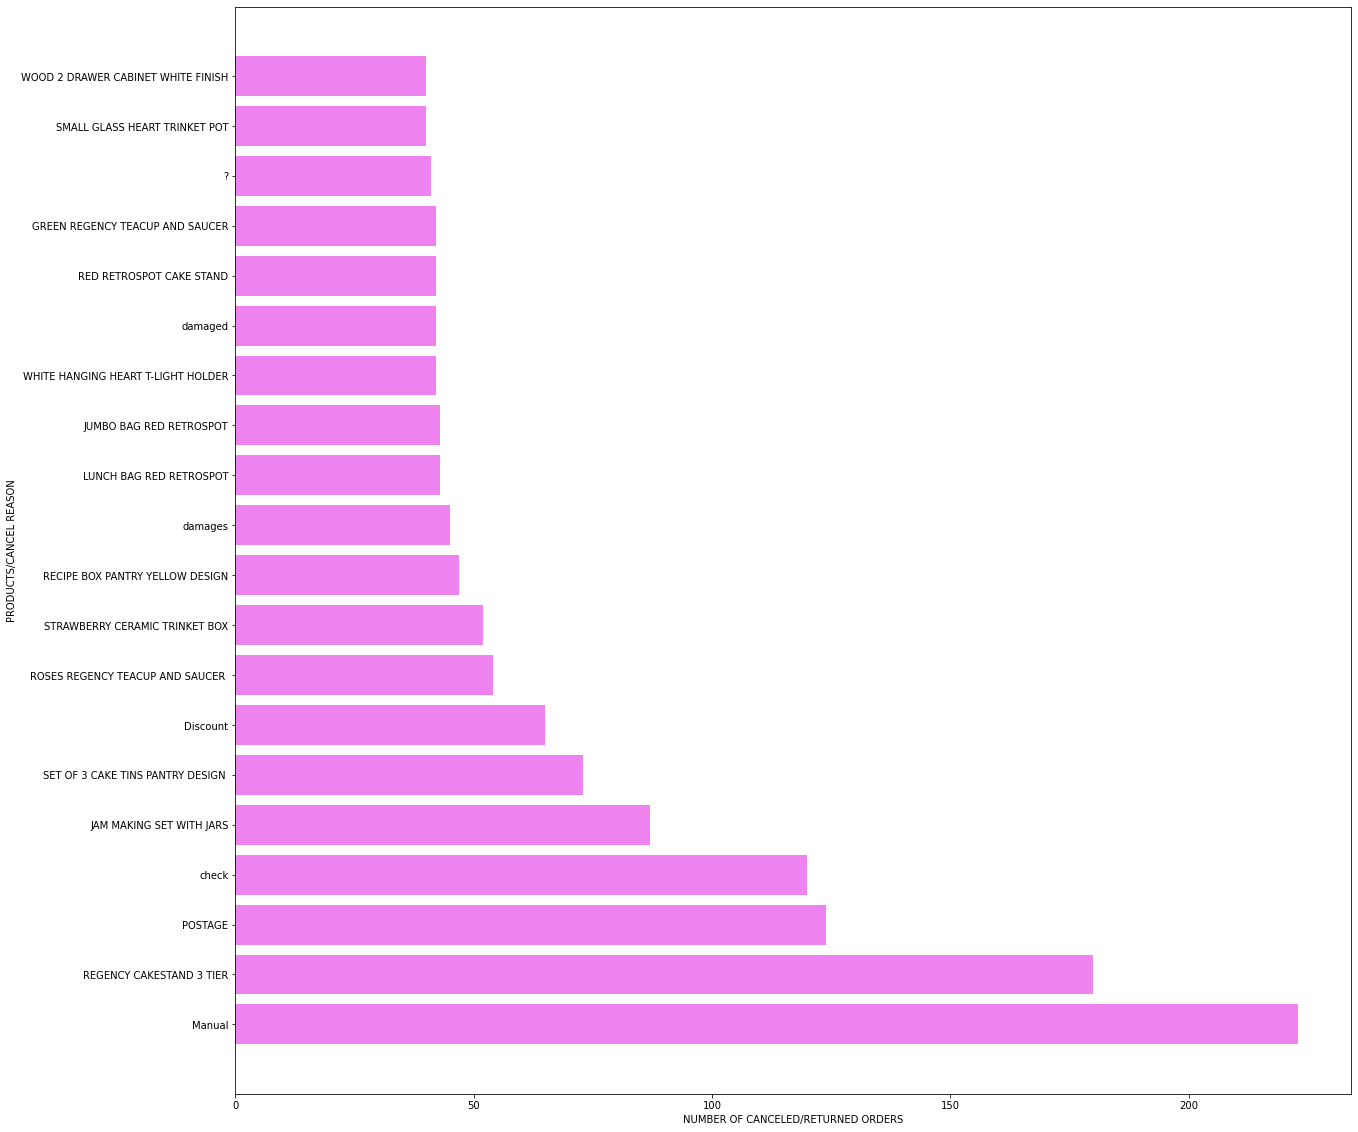

In [100]:
plt.figure(figsize=(20, 20))
plt.barh(top_20_cancel['product'], top_20_cancel['canceled_orders'], color='violet')
plt.xlabel('NUMBER OF CANCELED/RETURNED ORDERS')
plt.ylabel('PRODUCTS/CANCEL REASON')
plt.show()